# Neural Network Assessment

In this homework, we will dive into how neural networks work behind the scene. You will have a chance to implement functions vital to training a neural network: `forward`, `compute_loss`, `backward`, and `gradient_descent_step`; as well as implementing a small neural network for predicting the gravity of Mars!
  
The format of this homework will consist of function implementations and function unit-tests. There are no hidden tests - you receive full credit if you pass all the unit tests!
<img src="https://miro.medium.com/max/791/0*hzIQ5Fs-g8iBpVWq.jpg" alt="Neural Network" style="width: 400px;"/>


Table of Contents:  
    - [Forward](#Forward)  
    - [Compute Loss](#Compute-Loss)  
    - [Backward](#Backward)  
    - [Gradient Descent](#Gradient-Descent)  
    - [Toy Example: Gravity of Mars](#Toy-Example:-Gravity-of-Mars)

## Install and import required python libraries

In [1]:
!pip install torch numpy matplotlib
import numpy as np
from ModelWrapper import check_answer
import matplotlib.pyplot as plt

# Forward

Implement forward propogation of a neural network with no biases - only weights $w$ and input $x$. Check with the instructor if you are lost!

<img src="https://iartag.github.io/hek-ml-workshop/slides/static/images/3blue1brown_13_forward.gif" alt="Forward" style="width: 300px;"/>
  
Fill out this `forward` function, and use the cell below it to check your answer!

In [2]:
def forward(w, x):
    '''
    @param w: weights of our neural net model
    @param x: input data
    
    @return y: prediction calculated
    '''
    y = w * x
    return y

In [3]:
# Verify correctness of forward(w, x)

x = np.array([0.10298026, 0.41655058, 0.48560227, 0.60588507, 0.8701086,
           0.63899074, 0.32650349, 0.66185029, 0.43323724, 0.95059843])
w = 0.83106743

correct_answer = np.array([0.08558354, 0.34618162, 0.40356823, 0.50353135, 0.72311892,
                           0.53104439, 0.27134642, 0.55004222, 0.36004936, 0.79001139])

check_answer(correct_answer, forward(w, x))


Difference between correct answer and your solution is 4.390742303453521e-18
Passed!


# Compute Loss

Implement Mean Square Error loss given our `prediction`(from forward) and our `ground_truth`(the label).

(Hint: MSE loss is defined as ...)

<img src="https://miro.medium.com/max/1400/1*WDKhO-z7rti70ZTv59yJ9A.jpeg" alt="MSE Loss" style="width: 400px;"/>

Fill out this `compute_loss` function, and use the cell below it to check your answer!

In [4]:
def compute_loss(prediction, ground_truth):
    '''
    @param prediction: prediction our model made
    @param ground_truth: the real value corresponding to input data
    
    @return loss: the Mean Squared Error between prediction and ground_truth
    '''
    loss = np.mean((prediction - ground_truth) ** 2)
    return loss

In [5]:
# Verify correctness of compute_loss(prediction, ground_truth)

prediction = np.array([0.08558354, 0.34618162, 0.40356823, 0.50353135, 0.72311892,
                       0.53104439, 0.27134642, 0.55004222, 0.36004936, 0.79001139])

ground_truth = np.array([0.64265615, 0.38801768, 0.95016593, 0.824352  , 0.44688882,
                         0.36782865, 0.90771466, 0.74559116, 0.52141405, 0.84289056])

correct_answer = 0.12887562243845122
check_answer(correct_answer, compute_loss(prediction, ground_truth))


Difference between correct answer and your solution is 0.0
Passed!


# Backward

Implement backward propogation of our neural network to compute the gradient of loss with respect to our weights $\frac{d \text{loss}}{d \text{w}}$, given our weights used `w`, our inputs `x`, our label `ground_truth`, and the computed MSE `loss`. This question is very math heavy - use all your differentiation tools!

<img src="https://miro.medium.com/max/700/1*LB10KFg5J7yK1MLxTXcLdQ.jpeg" alt="Backprop" style="width: 400px;"/>

Fill out this `backward` function, and use the cell below it to check your answer!  
  
(Hint: if you are stuck, check out [the chain rule](https://www.mathtutor.ac.uk/differentiation/thechainrule), [the product rule](https://www.mathtutor.ac.uk/differentiation/theproductrule), and [the quotient rule](https://www.mathtutor.ac.uk/differentiation/thequotientrules))

In [6]:
def backward(w, x, ground_truth, loss):
    '''
    @param w: weights of our neural net model
    @param x: input data
    @param ground_truth: the real value corresponding to input data
    @param loss: the Mean Squared Error between prediction and ground_truth
    
    @return gradient: (dl/dw) gradient of MSE loss against w
    '''
    gradient = np.mean(2*x*(x*w - ground_truth))
    return gradient

In [7]:
# Verify correctness of backward(w, x, ground_truth, loss)

x = np.array([0.10298026, 0.41655058, 0.48560227, 0.60588507, 0.8701086,
           0.63899074, 0.32650349, 0.66185029, 0.43323724, 0.95059843])
w = 0.83106743

ground_truth = np.array([0.64265615, 0.38801768, 0.95016593, 0.824352  , 0.44688882,
                         0.36782865, 0.90771466, 0.74559116, 0.52141405, 0.84289056])

correct_answer = -0.12946738659087742
check_answer(correct_answer, backward(w, x, ground_truth, compute_loss(prediction, ground_truth)))

Difference between correct answer and your solution is 0.0
Passed!


# Gradient Descent

Implement gradient descent to optimize our neural network for minimum loss.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG_0.png" alt="GradDesc" style="width: 250px;"/>

Fill out this `gradient_descent_step` function, and use the cell below it to check your answer!  

In [8]:
def gradient_descent_step(w, gradient, learning_rate):
    '''
    @param w: weights of our neural net model
    @param gradient: (dl/dw) gradient of MSE loss against w
    @param learning_rate: learning rate for gradient descent algorithm
    
    @return updated_w: new weights for our model after taking one gradient descent step
    '''
    updated_w = w - learning_rate * gradient
    return updated_w

In [9]:
# Verify correctness of gradient_descent_step(w, graident, learning_rate)

w = 0.83106743
gradient = -0.12946738659087742
learning_rate = 1e-4

correct_answer = 0.8310803767386591
check_answer(correct_answer, gradient_descent_step(w, gradient, learning_rate))

Difference between correct answer and your solution is 0.0
Passed!


# Toy Example: Gravity of Mars

NASA recently landed a rover on Mars! To emperically measure the gravity of Mars, NASA sent the rover with 100 objects of known mass(measured on Earth with gravity of Earth). The rover was able to measure the amount of gravitational forces experienced by each of these 100 objects. Help NASA find the gravity of Mars using gradient descent!

<img src="https://s.yimg.com/os/creatr-uploaded-images/2020-07/131e69b0-cad0-11ea-a7f3-ff12d4122702" alt="MarsRover" style="width: 500px;"/>

### Data has already been collected for you here:

In [10]:
# Data collected
gravitational_forces_measured = np.array([74.33922471, 18.89621021, 30.58944369, 87.37739668, 60.4725419 ,
       57.6803083 , 56.2648722 , 93.00173316, 42.709132  , 41.79055808,
       80.04357277, 71.69702041, 57.35612417, 45.43189827, 58.20043038,
       64.31022133, 28.42197906, 42.53010491, 85.1058512 , 38.93001604,
       49.52833613, 33.22718541, 91.75993885, 56.21887701, 80.93994588,
       48.01562877, 18.9732248 , 57.74769716, 45.84018553, 91.60806876,
       19.70652165, 37.60727816, 45.61403876, 69.8887408 , 52.77067505,
       44.82916722, 18.85670526, 86.9777561 , 56.82597148, 65.92260198,
       71.53819987, 64.0595462 , 22.58504336, 48.96056478, 28.25736909,
       21.70609598, 38.96906147, 30.87682747, 76.77237865, 67.3654563 ])
mass_known = np.array([19.97829966,  5.07833211,  8.22078435, 23.48221443, 16.25162994,
       15.50120738, 15.1208723 , 24.9937833 , 11.47791295, 11.23109415,
       21.51129403, 19.26826622, 15.4140919 , 12.20962345, 15.64103563,
       17.28298684,  7.63826191, 11.42969585, 22.87174834, 10.46217718,
       13.3105441 ,  8.9295792 , 24.66007791, 15.10851944, 21.75213904,
       12.90390673,  5.09905799, 15.51950094, 12.31934303, 24.6191229 ,
        5.29592859, 10.10680612, 12.25849186, 18.78223016, 14.18179067,
       12.04753032,  5.0676313 , 23.37479313, 15.27177695, 17.71636206,
       19.22556517, 17.21566366,  6.06971178, 13.15797054,  7.59393684,
        5.83347426, 10.47273137,  8.29789311, 20.63209229, 18.10405342])

### Complete the neural network training loop by fill out the lines marked with #TODO!

#### (Hint: gravitational_forces_measured = gravity_of_mars * mass_known)

You should be able to see the Gravity of Mars our neural network converged to, and our loss/weight trajectory as it converges.

Gravity of Mars found: 3.721002972221443


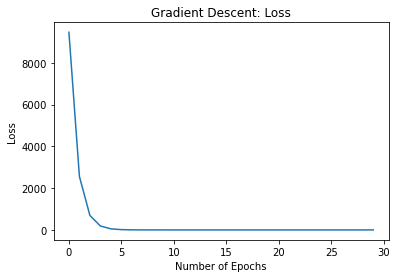

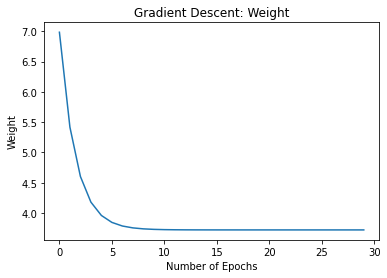

In [11]:
w = 10 # initial w
learning_rate = 1e-3
num_epochs = 30

loss_trajectory = []
w_trajectory = []

for _ in range(num_epochs):
    prediction = forward(w, mass_known)            # TODO: Use our current model to predict
    loss = compute_loss(prediction, gravitational_forces_measured)        # TODO: Compute the loss between our prediction and the ground truth
    gradient = backward(w, mass_known, gravitational_forces_measured, loss)                       # TODO: Compute gradients for our model parameters
    w = gradient_descent_step(w, gradient, learning_rate)                # TODO: Update our model parameters with the computed gradients
    loss_trajectory.append(loss)
    w_trajectory.append(w)

plt.title("Gradient Descent: Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(loss_trajectory)

plt.figure()
plt.title("Gradient Descent: Weight")
plt.xlabel("Number of Epochs")
plt.ylabel("Weight")
plt.plot(w_trajectory)

print(f"Gravity of Mars found: {w}")


### Congratulations on mastering the keys to neural networks!